# Practice Project-5

# Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.

# Survived column is our target variable

# Importing Libraries and Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

# Checking for Null values

In [6]:
df.isnull().sum()     

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

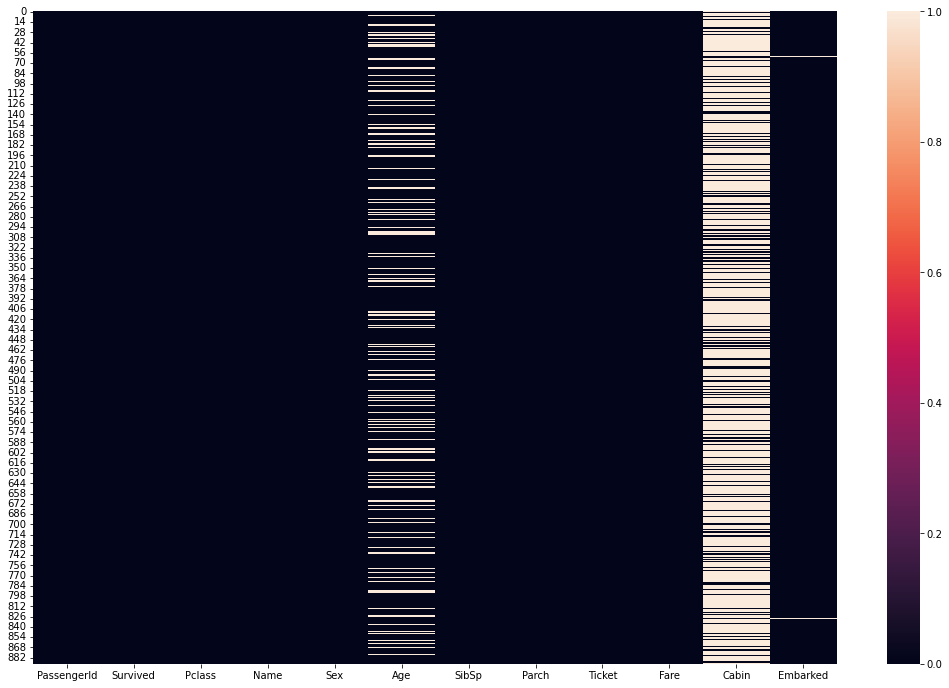

In [7]:
plt.figure(figsize=(18,12))       #plotting null values in heatmap
sns.heatmap(df.isnull())
plt.show()

Obs:
    As we can see too many missing values are there in column age and Cabin and two missing value in embarked

In [8]:
df.loc[df['Survived']==" "]  # checking for spaccing values if any 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Checking Duplicates

In [9]:
df.duplicated().sum()

0

No duplicates exits

# Filling Null Values

In [10]:
#filling missing values in age by median
df['Age'] = df['Age'].fillna((df['Age'].median()))

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# for categorical columns using Simple Imputer for filling missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

df['Cabin']= imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#removed all missing values

# Checking for Zero values:

In [14]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,B96 B98,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,B96 B98,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,B96 B98,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,B96 B98,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,B96 B98,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,B96 B98,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,B96 B98,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,B96 B98,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,B96 B98,S


As we can see that Fare with the 0 values has Embarked from S and only Cabin A, B and G. so we will treat this

In [15]:
df['Cabin'] = df['Cabin'].astype(str).str[:1]  # chnaging datatype

In [16]:
df['Cabin'].value_counts()

B    734
C     59
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [17]:
df[(df["Cabin"] == 'A' )& (df['Embarked']=='S')].mean()

PassengerId    465.375000
Survived         0.375000
Pclass           1.000000
Age             33.250000
SibSp            0.000000
Parch            0.250000
Fare            40.731763
dtype: float64

The mean of Cabin A with the Embarkation point S is 40.73. Hence we will replace the 0 with 40.73

In [18]:
df.loc[(df["Cabin"] == 'A' )& (df['Fare']==0), 'Fare']=40.73

In [19]:
df[(df["Cabin"] == 'B' )& (df['Embarked']=='S')].mean()

PassengerId    454.209259
Survived         0.287037
Pclass           2.550000
Age             28.348759
SibSp            0.592593
Parch            0.403704
Fare            21.102112
dtype: float64

The mean of Cabin B with the Embarkation point S is 21.10. Hence we will replace the 0 with 21.10

In [20]:
df.loc[(df["Cabin"] == 'B' )& (df['Fare']==0), 'Fare']=21.10

In [21]:
df[(df["Cabin"] == 'G' )& (df['Embarked']=='S')].mean()

PassengerId    216.00000
Survived         0.50000
Pclass           3.00000
Age             14.75000
SibSp            0.50000
Parch            1.25000
Fare            13.58125
dtype: float64

The mean of Cabin B with the Embarkation point S is 13.58. Hence we will replace the 0 with 13.58

In [22]:
df.loc[(df["Cabin"] == 'G' )& (df['Fare']==0), 'Fare']= 13.58

In [23]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Hence we have replaced all zero values in fare columns

# Using Lable Encoder For categorical column

In [24]:
df.drop(['Name','PassengerId'],axis=1, inplace= True)
df   # droping name and passenger ID as it is does not make any difference on target variable

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,B,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,B,S
887,1,1,female,19.0,0,0,112053,30.0000,B,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,B,S
889,1,1,male,26.0,0,0,111369,30.0000,C,C


In [25]:
le = LabelEncoder()
list1 =['Sex','Embarked','Cabin','Ticket']
for val in list1:
    df[val]= le.fit_transform(df[val].astype(str))

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,1,2
1,1,1,0,38.0,1,0,596,71.2833,2,0
2,1,3,0,26.0,0,0,669,7.9250,1,2
3,1,1,0,35.0,1,0,49,53.1000,2,2
4,0,3,1,35.0,0,0,472,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,1,2
887,1,1,0,19.0,0,0,14,30.0000,1,2
888,0,3,0,28.0,1,2,675,23.4500,1,2
889,1,1,1,26.0,0,0,8,30.0000,2,0


# Checking Unique Values and Value Counts

In [26]:
for col in df:
    print(col,  --- df[col].nunique())
    

Survived -2
Pclass -3
Sex -2
Age -88
SibSp -7
Parch -7
Ticket -681
Fare -249
Cabin -8
Embarked -3


In [27]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print("\n")

Survived
0    549
1    342
Name: Survived, dtype: int64


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


Sex
1    577
0    314
Name: Sex, dtype: int64


Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Ticket
333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 249, dtype: int64


Cabin
1    734
2     59
3     33
4     32
0     15
5     13
6      4
7      1
Name: Cabin, dtype: int64



Observation:
    Data is imbalnced as we can see from the output of value counts and unique values

# EDA

# Descriptive Statistics

In [28]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,338.528620,32.581458,1.318743,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,200.850657,49.536211,0.916440,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,4.012500,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.925000,1.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,15.100000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.137500,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,7.000000,2.000000


# Visualization of Data

In [29]:
# Set the global default size of matplotlib figures using runtime configuration
plt.rc('figure', figsize=(10, 5))            

# Size of matplotlib figures that contain subplots 
figsize_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

Text(0.5, 1.0, 'Age Histogram')

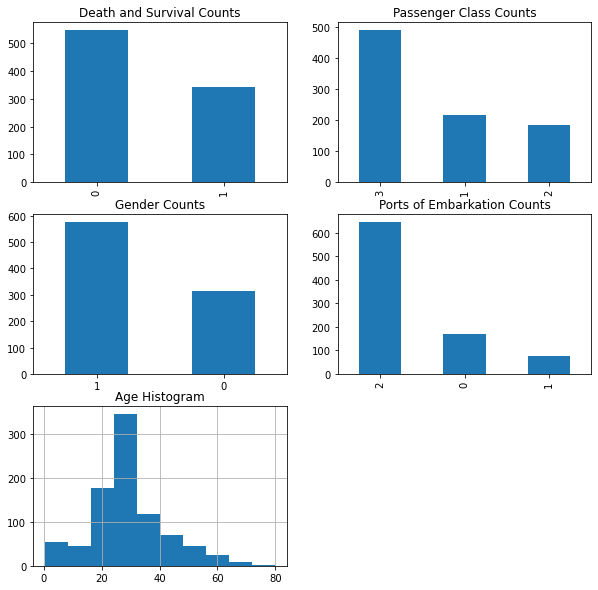

In [30]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Age'].hist()
plt.title('Age Histogram')

([<matplotlib.patches.Wedge at 0x212f8896640>,
 [Text(-0.4919454136803954, 0.9838646807152012, '1'),
  Text(0.4919455057964525, -0.9838646346559433, '0')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.76%'),
  Text(0.26833391225261044, -0.53665343708506, '35.24%')])

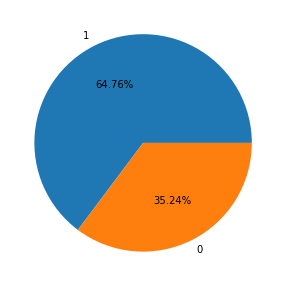

In [31]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%'  )

Obs : from pie plot we can see more men were travelling in ship 

# To check survival rate per passenger class

In [32]:
#plotting a crosstab
pclass_surv = pd.crosstab(df['Pclass'], df['Survived'])
pclass_surv

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

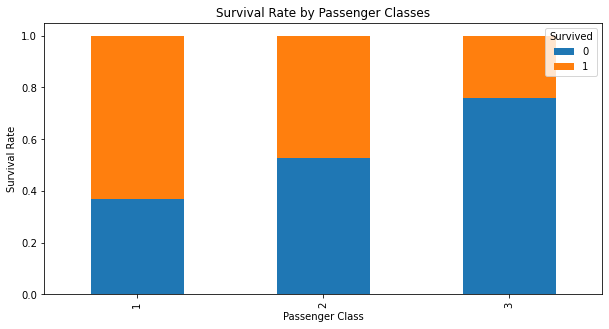

In [33]:
# Normalize the cross tab to sum to 1:
pclass_surv_pct = pclass_surv.div(pclass_surv.sum(1).astype(float), axis=0)

pclass_surv_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Observation:
    We can see from above plot that maximum people are survived from passerger class 1 then 2 then 3

# To Check Survival rate per gender 

In [34]:
#plotting a cross tab
Sex_surv = pd.crosstab(df['Sex'], df['Survived'])
Sex_surv

Survived,0,1
Sex,,
0,81,233
1,468,109


Text(0, 0.5, 'Survival Rate')

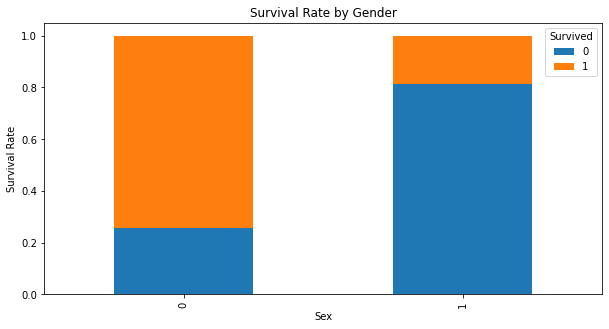

In [35]:
# Normalize the cross tab to sum to 1:
Sex_surv_pct = Sex_surv.div(Sex_surv.sum(1).astype(float), axis=0)

Sex_surv_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# 1 is male and 0 is female from gender after converting using label encoder

Obs- It is observed that more men died than females

# Survival rate per passenger class per gender

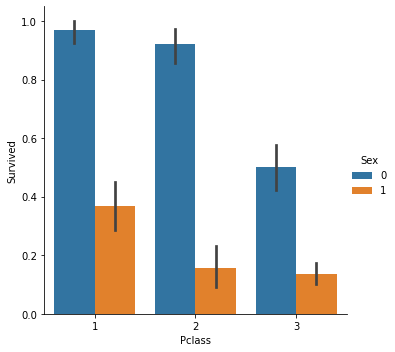

In [36]:
sns.catplot(x="Pclass",y="Survived",hue='Sex', data=df,kind='bar')  

# Survival Rate per Port of embarked

Text(0, 0.5, 'Survival Rate')

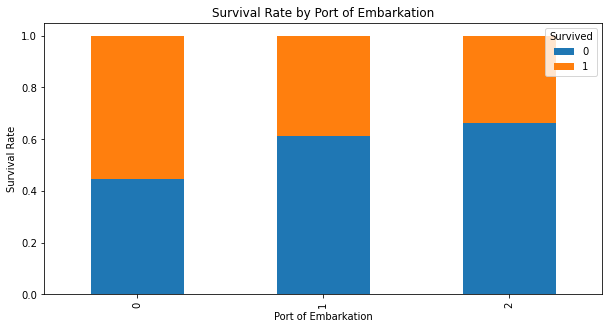

In [37]:
embarked_xt = pd.crosstab(df['Embarked'], df['Survived'])
embarked_xt_pct =embarked_xt.div(embarked_xt.sum(1).astype(float), axis=0)
embarked_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

Obs- more people survived from port 0 i.e. from port c and less people survived from port 2 i.e. port S

# Survival rate per cabin 

Text(0, 0.5, 'Survival Rate')

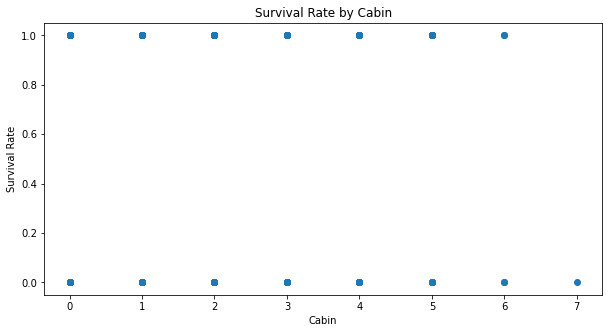

In [38]:
plt.scatter(df['Cabin'],df['Survived'])
plt.title('Survival Rate by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Survival Rate')

Obs: We can see survival rate is greater from cabin 70-140

# Survival Rate vs Age Group

Text(0, 0.5, 'Age')

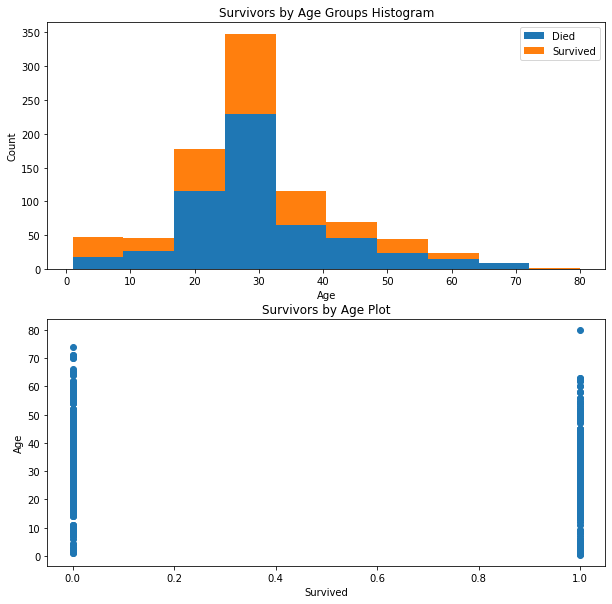

In [39]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=figsize_subplots)

# Histogram of Age segmented by Survived
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']
max_age = max(df['Age'])
axes[0].hist([df1, df2], range=(1, max_age),stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')


# Scatter plot Survived and Age
axes[1].scatter(df['Survived'], df['Age'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')


# Family size dependency on survival

In [40]:
df['FamilySize'] = df['SibSp'] + df['Parch']   # adding this two columns to form one single columns 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,3,1,22.0,1,0,523,7.2500,1,2,1
1,1,1,0,38.0,1,0,596,71.2833,2,0,1
2,1,3,0,26.0,0,0,669,7.9250,1,2,0
3,1,1,0,35.0,1,0,49,53.1000,2,2,1
4,0,3,1,35.0,0,0,472,8.0500,1,2,0


Text(0.5, 1.0, 'Family Size Histogram')

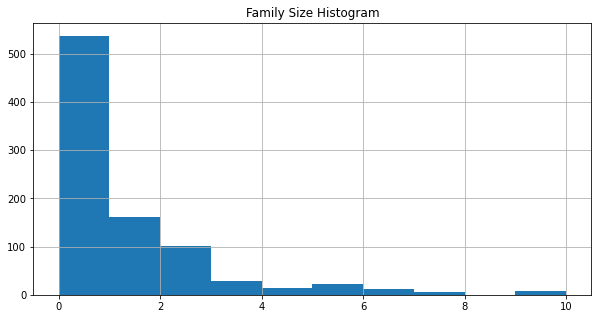

In [41]:
df['FamilySize'].hist()
plt.title('Family Size Histogram')

Text(0.5, 1.0, 'Survivors by Family Size')

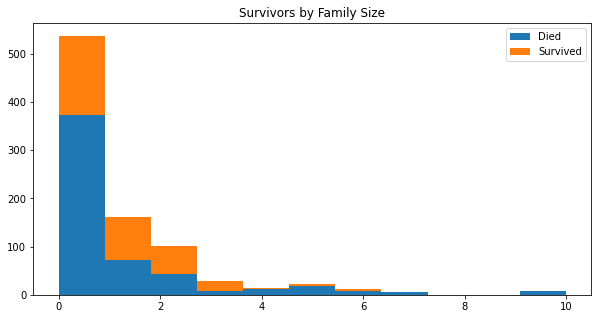

In [42]:
# Get the unique values of Embarked and its maximum
fs = sorted(df['FamilySize'].unique())
family_size_max = max(fs)

df1 = df[df['Survived'] == 0]['FamilySize']
df2 = df[df['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

obs : More people died having family size between 0 - 2

# Pairplot

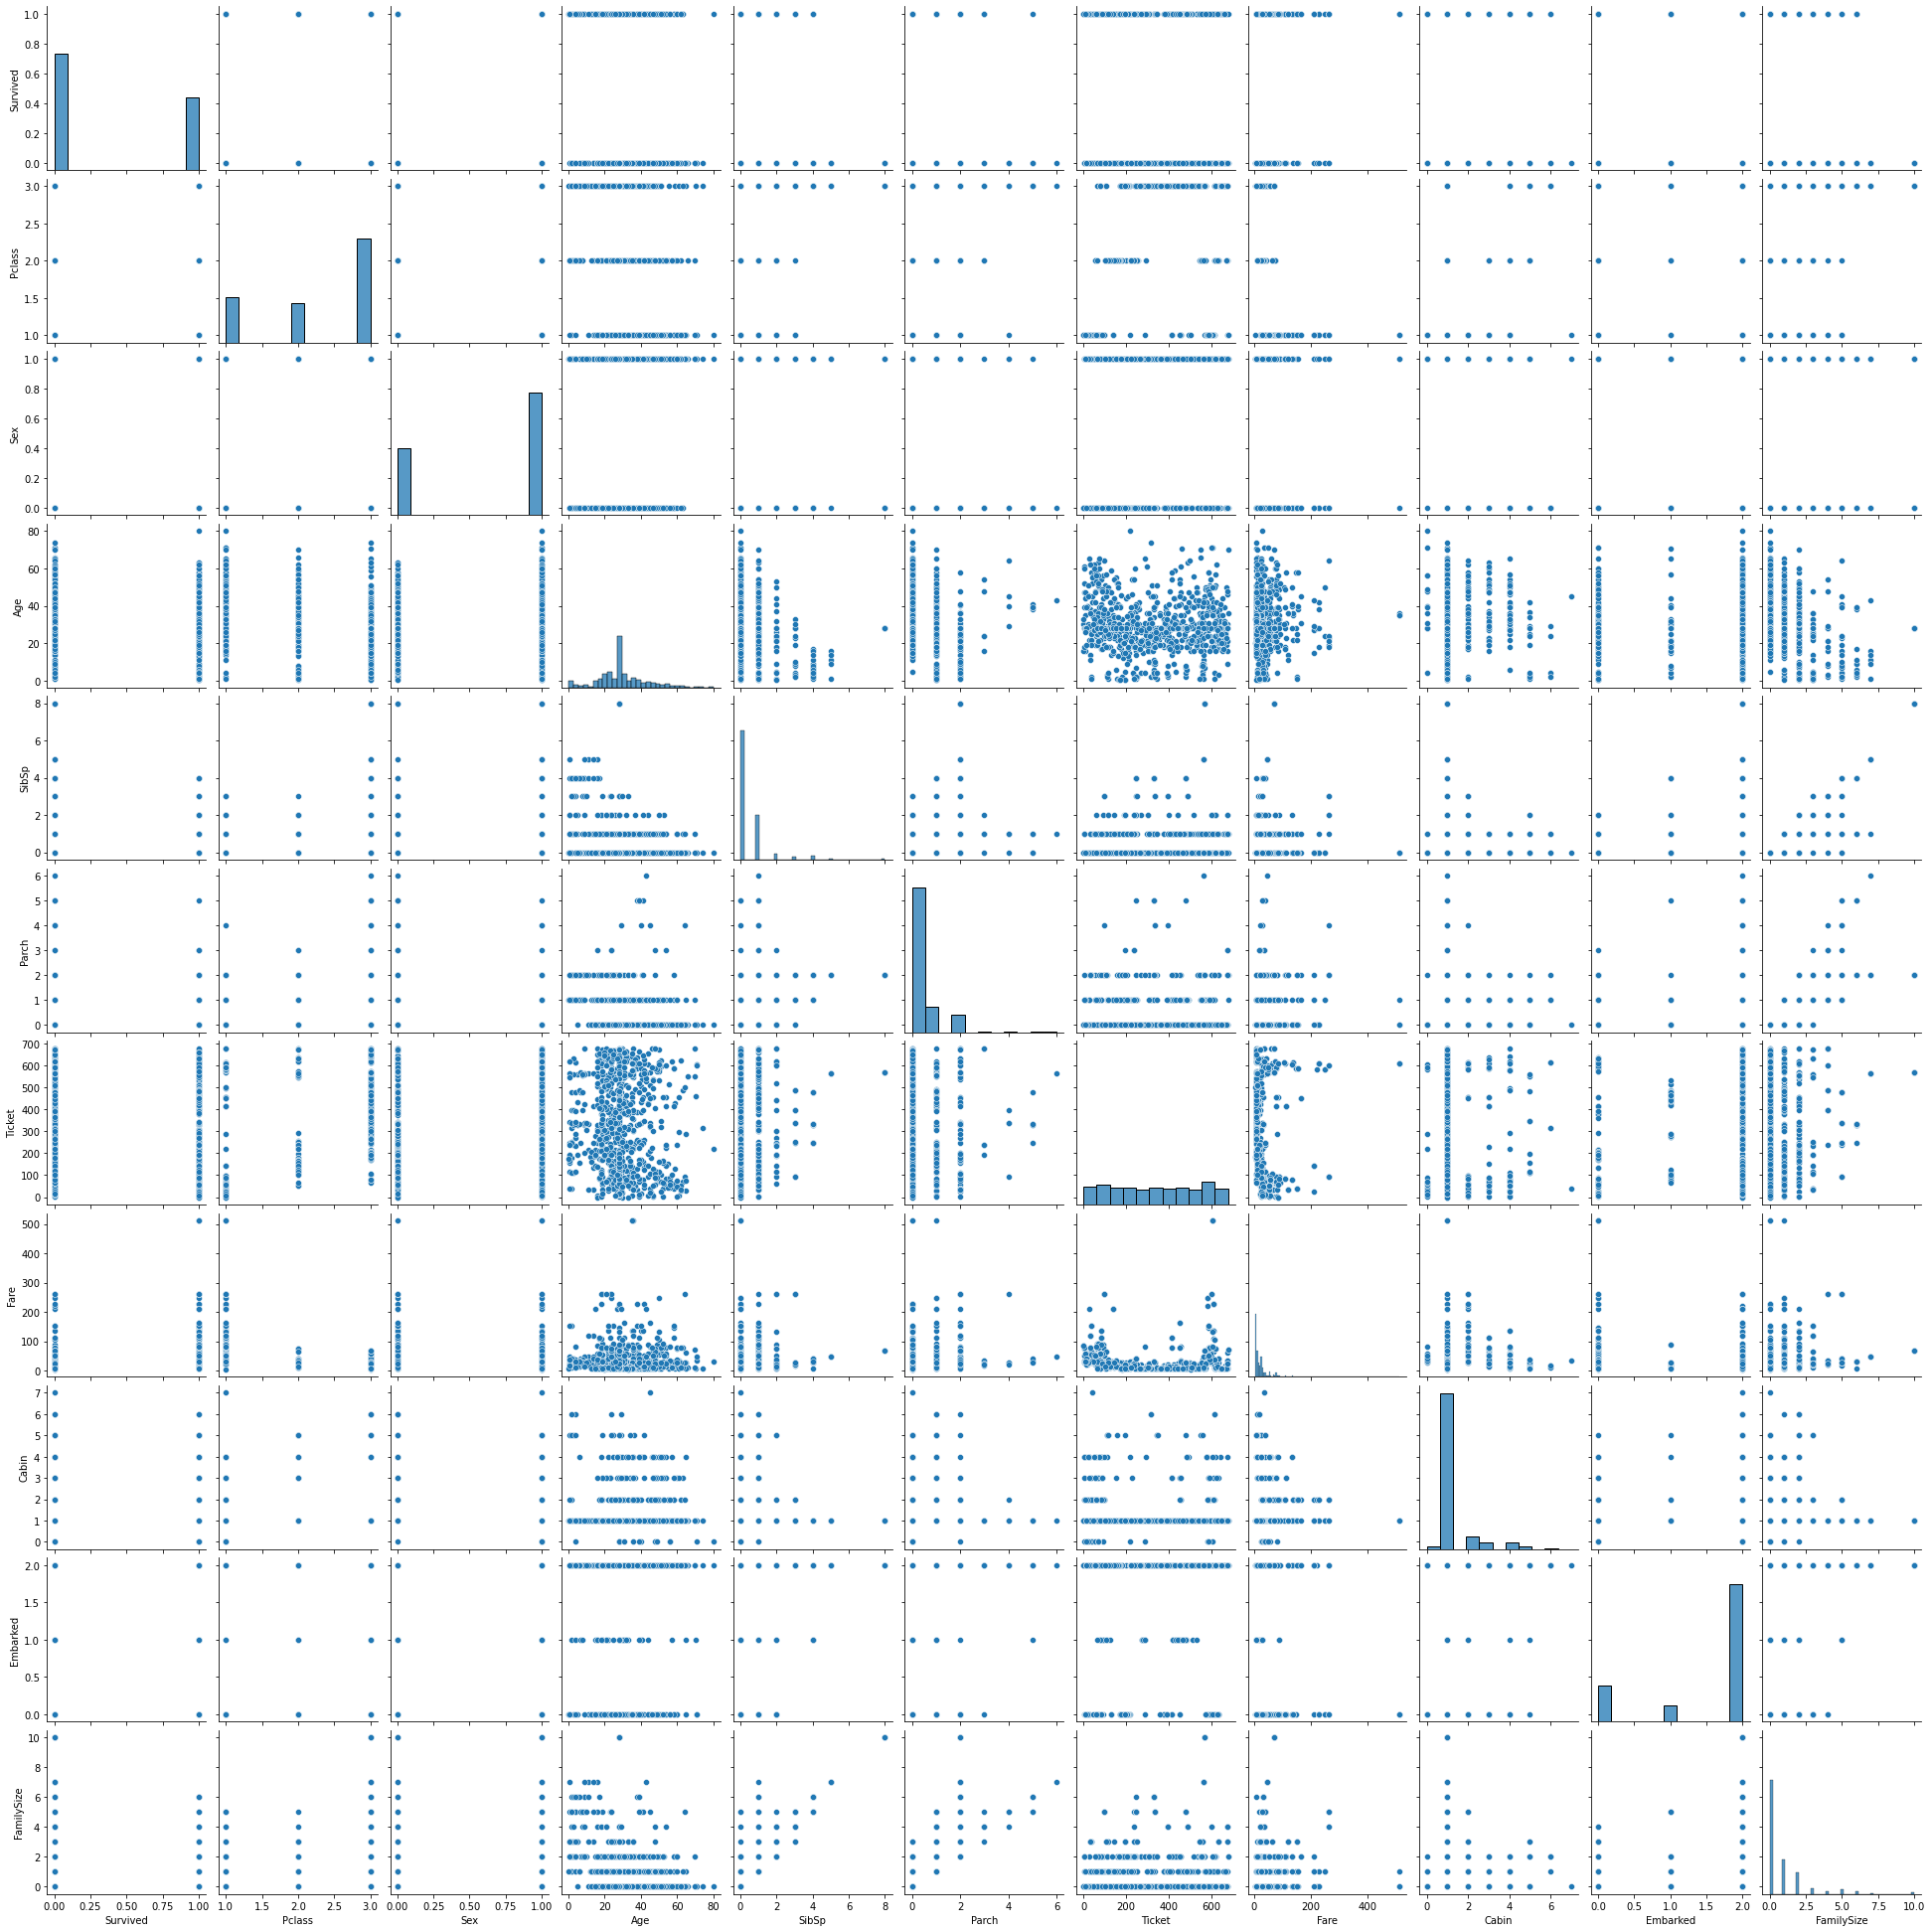

In [43]:
sns.pairplot(df)
plt.savefig("pairplot.png")
plt.show()

# Outliers Checking:

Survived          AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Sex            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Age              AxesSubplot(0.125,0.518913;0.227941x0.16413)
SibSp         AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Parch         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Ticket           AxesSubplot(0.125,0.321957;0.227941x0.16413)
Fare          AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Cabin         AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Embarked            AxesSubplot(0.125,0.125;0.227941x0.16413)
FamilySize       AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

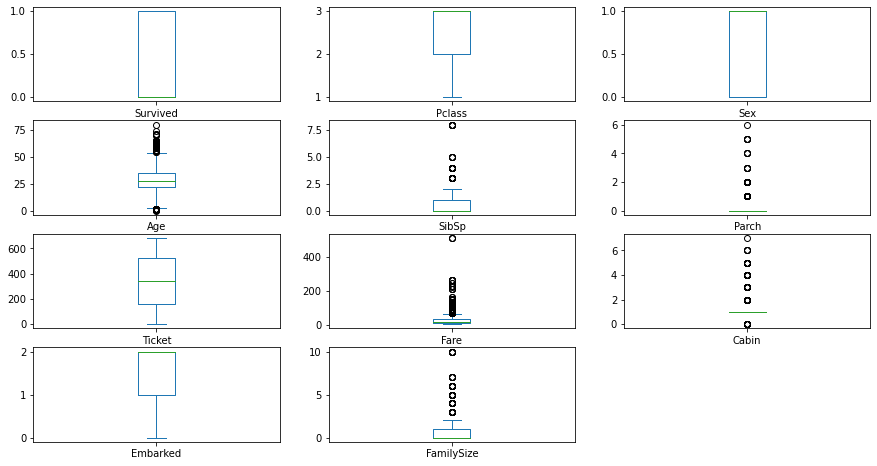

In [44]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,8))

Obs - We can see from above plots that columns Age, SibSp, Parch, Fare, Cabin has outliers

# Checking Skewness:

Survived = 0.4777174662568536
Pclass = -0.6294858816096934
Sex = -0.6178784065548295
Age = 0.5093852558219663
Fare = 4.806504578543003
Embarked = -1.2626927433430535
Parch = 2.7444867379203735
SibSp = 3.6891276847759507
FamilySize = 2.7228476726920388


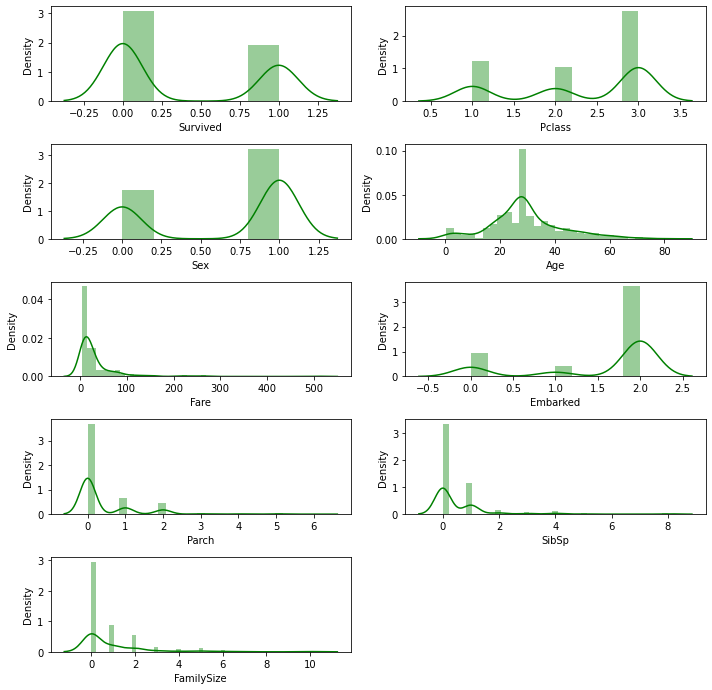

In [45]:
from scipy.stats import skew
df['FamilySize'] = df['SibSp'] + df['Parch']
columns = ['Survived','Pclass','Sex','Age','Fare','Embarked','Parch','SibSp','FamilySize']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    print(columns[i],"=",skew(df[columns[i]]))
    plt.subplot(8,2, i+1)
    sns.distplot(df[columns[i]],color = 'g');
    
plt.tight_layout()

# Checking Correlation:

<AxesSubplot:>

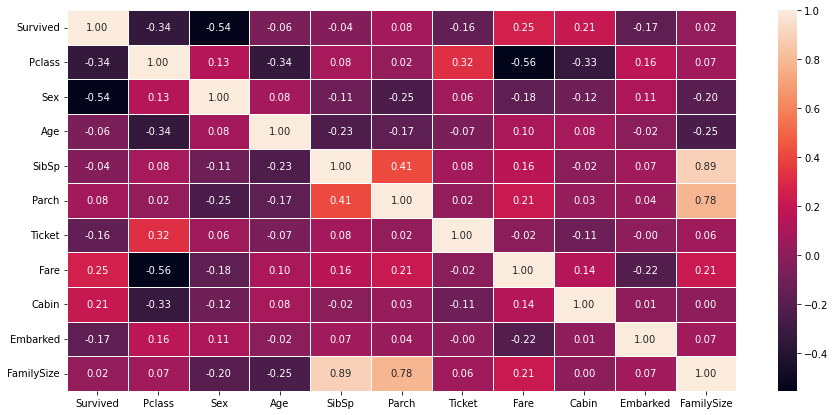

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True,linewidth=0.5,linecolor="white",fmt='0.2f')

# Checking Multicollinearity:

In [47]:
x = df.drop(['Survived'], axis=1)
x        #features dataframe

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,3,1,22.0,1,0,523,7.2500,1,2,1
1,1,0,38.0,1,0,596,71.2833,2,0,1
2,3,0,26.0,0,0,669,7.9250,1,2,0
3,1,0,35.0,1,0,49,53.1000,2,2,1
4,3,1,35.0,0,0,472,8.0500,1,2,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,1,2,0
887,1,0,19.0,0,0,14,30.0000,1,2,0
888,3,0,28.0,1,2,675,23.4500,1,2,3
889,1,1,26.0,0,0,8,30.0000,2,0,0


In [48]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [50]:
calc_vif(x)

,variables,VIF FACTOR
0,Pclass,8.152752
1,Sex,3.087712
2,Age,5.088606
3,SibSp,inf
4,Parch,inf
5,Ticket,4.502066
6,Fare,1.856388
7,Cabin,2.866767
8,Embarked,4.845995
9,FamilySize,inf


Obs:
    All values are below 10 so no need to remove and columns inf indicated perfect correlation and inf shows perfect correlation.
    

# Removing Outliers:

In [51]:
from scipy.stats import zscore
z = np.array(abs(zscore(df)))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.34800107, 0.58595414,
        0.05915988],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.74379101, 1.9423032 ,
        0.05915988],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.34800107, 0.58595414,
        0.56097483],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.34800107, 0.58595414,
        1.29942929],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.74379101, 1.9423032 ,
        0.56097483],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.34800107, 0.67817453,
        0.56097483]])

In [52]:
threshold = 3
print(np.where(z>3))

(array([ 10,  13,  13,  16,  25,  25,  27,  50,  59,  59,  66,  68,  68,
        71,  71,  75,  86,  88,  96, 116, 118, 119, 119, 128, 148, 159,
       159, 164, 167, 171, 180, 180, 182, 182, 183, 193, 201, 201, 205,
       233, 233, 251, 258, 261, 261, 266, 278, 299, 311, 324, 324, 339,
       340, 341, 345, 360, 377, 380, 386, 386, 394, 437, 438, 438, 480,
       480, 493, 516, 527, 541, 541, 542, 542, 557, 567, 610, 610, 618,
       630, 638, 672, 678, 678, 679, 683, 683, 686, 689, 699, 700, 715,
       716, 730, 736, 737, 742, 745, 774, 776, 779, 787, 792, 792, 813,
       813, 824, 846, 846, 850, 850, 851, 858, 863, 863, 885], dtype=int64), array([ 8,  5, 10,  4,  5, 10,  7,  4,  4, 10,  8,  4, 10,  4, 10,  8,  5,
        7,  3,  3,  7,  4, 10,  8,  8,  4, 10,  4,  5,  4,  4, 10,  4, 10,
        8,  8,  4, 10,  8,  4, 10,  8,  7,  4, 10,  4,  4,  7,  7,  4, 10,
        8,  8,  7,  8,  5,  7,  7,  4, 10,  8,  5,  5,  7,  4, 10,  3,  8,
        7,  4, 10,  4, 10,  7,  5,  5, 10,  8,

In [53]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,3,1,22.0,1,0,523,7.2500,1,2,1
1,1,1,0,38.0,1,0,596,71.2833,2,0,1
2,1,3,0,26.0,0,0,669,7.9250,1,2,0
3,1,1,0,35.0,1,0,49,53.1000,2,2,1
4,0,3,1,35.0,0,0,472,8.0500,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,1,2,0
887,1,1,0,19.0,0,0,14,30.0000,1,2,0
888,0,3,0,28.0,1,2,675,23.4500,1,2,3
889,1,1,1,26.0,0,0,8,30.0000,2,0,0


In [54]:
df.shape

(891, 11)

In [55]:
df_new.shape

(802, 11)

In [56]:
Data_loss = ((891-786)/891)*100
Data_loss

11.784511784511785

# Removing Skewness:

In [57]:
df_new['Parch']= np.sqrt(df_new['Parch'])
skew(df_new['Parch'])

1.790972793377776

In [58]:
df_new['SibSp']= np.sqrt(df_new['SibSp'])
skew(df_new['SibSp'])

1.1487499939873147

In [59]:
# Again Removing skewness because it is still very high

In [60]:
df_new['Parch']= np.sqrt(df_new['Parch'])
skew(df_new['Parch'])

1.6826741983447697

In [61]:
df_new['SibSp']= np.sqrt(df_new['SibSp'])
skew(df_new['SibSp'])

0.994364226992927

In [62]:
# Again Removing skewness because it is still greater than 1

In [63]:
df_new['Parch']= np.sqrt(df_new['Parch'])
skew(df_new['Parch'])

1.6563727185254875

In [64]:
df_new['SibSp']= np.sqrt(df_new['SibSp'])
skew(df_new['SibSp'])

0.9647397885057539

In [65]:
df_new['Fare']= np.sqrt(df_new['Fare'])
skew(df_new['Fare'])

1.509045182942686

In [66]:
df_new['Fare']= np.sqrt(df_new['Fare'])
skew(df_new['Fare'])    # skewness reduced to 0.002

1.1464096273117843

Max value of skewness that can be achieved after 3 transformation is as above

In [67]:
df_new.skew()

Survived      0.466897
Pclass       -0.626953
Sex          -0.680786
Age           0.456056
SibSp         0.966548
Parch         1.659478
Ticket        0.032431
Fare          1.148559
Cabin         2.599672
Embarked     -1.255674
FamilySize    1.787565
dtype: float64

# Splitting the DataFrame in feature and target Column

In [68]:
x =  df_new.drop(['Survived','FamilySize'],axis = 1)
x  # feature dataframe

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.0,0.000000,523,1.640909,1,2
1,1,0,38.0,1.0,0.000000,596,2.905674,2,0
2,3,0,26.0,0.0,0.000000,669,1.677837,1,2
3,1,0,35.0,1.0,0.000000,49,2.699440,2,2
4,3,1,35.0,0.0,0.000000,472,1.684414,1,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0.0,0.000000,101,1.898829,1,2
887,1,0,19.0,0.0,0.000000,14,2.340347,1,2
888,3,0,28.0,1.0,1.090508,675,2.200573,1,2
889,1,1,26.0,0.0,0.000000,8,2.340347,2,0


In [69]:
y= df_new['Survived']
y # target dataframe

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 802, dtype: int64

# Balancing the data using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

In [71]:
sm = SMOTE(random_state=2)

x,y = sm.fit_resample(x, y.ravel())

In [72]:
x.value_counts()

Pclass  Sex  Age        SibSp     Parch     Ticket  Fare      Cabin  Embarked
3       1    28.000000  0.000000  0.000000  80      2.741600  1      2           5
1       0    24.000000  0.000000  0.000000  581     2.885249  1      0           3
2       1    28.000000  0.000000  0.000000  135     2.143239  1      2           3
3       0    28.000000  1.147203  1.000000  488     2.246431  1      2           3
                        1.000000  0.000000  476     2.003118  1      2           2
                                                                                ..
2       0    25.000000  1.000000  1.000000  133     2.340347  1      2           1
             25.553337  0.667026  0.611666  141     2.126663  1      2           1
             26.000000  1.000000  1.000000  167     2.258101  1      2           1
             26.433209  0.522264  0.522264  131     2.129418  1      2           1
3       1    65.000000  0.000000  0.000000  290     1.668497  1      1           1
Length: 9

In [73]:
x.shape

(984, 9)

In [74]:
y.shape

(984,)

In [75]:
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

Hence the data is now balanced

# Standardization of data

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94612089,  0.88647838, -0.60825525, ..., -1.00585519,
        -0.35335934,  0.64437952],
       [-1.41678001, -1.12805909,  0.69310014, ...,  1.50773618,
         1.00486562, -1.79904801],
       [ 0.94612089, -1.12805909, -0.28291641, ..., -0.93246423,
        -0.35335934,  0.64437952],
       ...,
       [-0.23532956, -1.12805909, -0.39515674, ..., -0.02107222,
        -0.35335934,  0.64437952],
       [-1.41678001, -1.12805909,  0.12008339, ...,  2.80659908,
        -0.35335934, -0.57733425],
       [ 0.94612089, -1.12805909, -0.56470291, ..., -0.91736531,
        -0.35335934,  0.64437952]])

In [78]:
x.mean() # standardize data have zero mean ... this mean value is approximately zero

2.00582298938601e-17

In [79]:
x.std()  # standardize data have unit variance

1.0

In [80]:
x.shape

(984, 9)

In [81]:
y=sc.fit_transform(y.values.reshape(-1,1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [82]:
y.shape

(984,)

In [83]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,

# Training the data

In [84]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [85]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state",i,"The model performs very well")
        print("at random_state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1),'\n\n')

At random_state 37 The model performs very well
at random_state:- 37
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 73 The model performs very well
at random_state:- 73
Training accuracy_score is:- 82.2
Testing accuracy_score is:- 82.2 


At random_state 109 The model performs very well
at random_state:- 109
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 112 The model performs very well
at random_state:- 112
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 249 The model performs very well
at random_state:- 249
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 257 The model performs very well
at random_state:- 257
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 269 The model performs very well
at random_state:- 269
Training accuracy_score is:- 81.7
Testing accuracy_score is:- 81.7 


At random_state 3

In [86]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

NameError: name 'train_x' is not defined